In [2]:
import pandas as pd
import numpy as np
# import nltk

In [3]:
emails = pd.read_csv("Emails.csv")

In [17]:
emails.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [18]:
emails.head(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 

In [4]:
# Assuming 'emails' is your DataFrame
tables = emails.groupby('SenderPersonId').size().reset_index(name='RowCount')
tables.columns = ['SenderPersonId', 'RowCount']

print(tables)

     SenderPersonId  RowCount
0               1.0         1
1               2.0         1
2               3.0         1
3               5.0         1
4               6.0         1
..              ...       ...
160           219.0         2
161           220.0         5
162           222.0         1
163           225.0         7
164           226.0         1

[165 rows x 2 columns]


/tmp/ipykernel_522/1545895148.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_senders['PersonId'] = top_senders['PersonId'].astype(str)


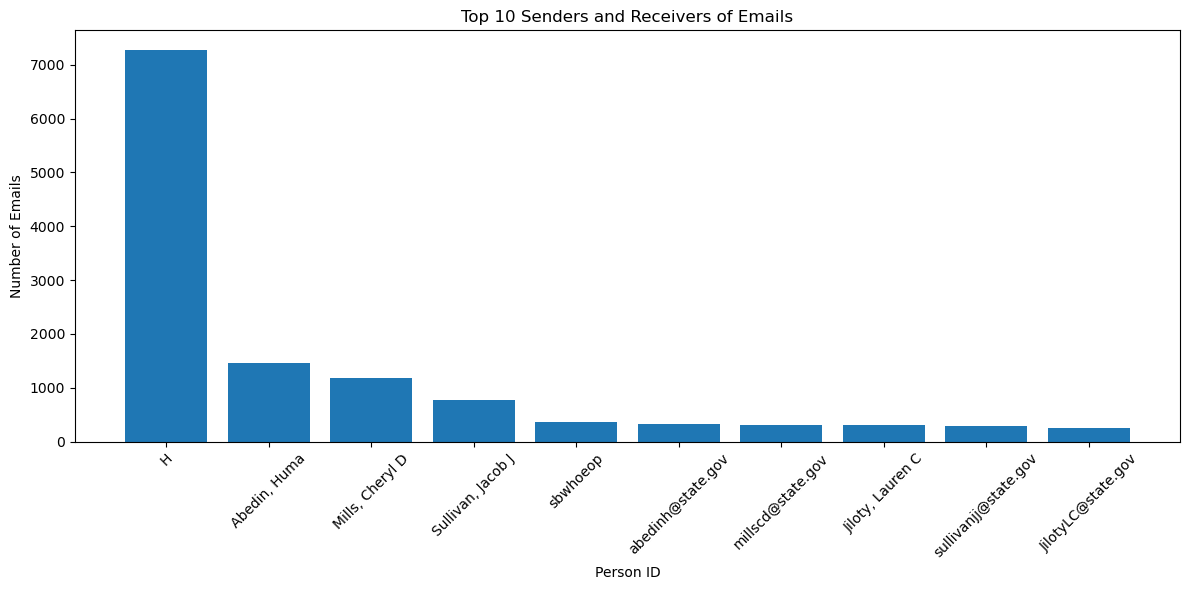

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
emails = pd.read_csv("Emails.csv")

# Get the count of emails sent by each sender
senders_counts = emails.groupby('MetadataFrom').size().reset_index(name='EmailsSent')
# Get the count of emails received by each receiver
receivers_counts = emails.groupby('MetadataTo').size().reset_index(name='EmailsReceived')

# Merge the sender and receiver counts
counts = pd.merge(senders_counts, receivers_counts, how='outer', left_on='MetadataFrom', right_on='MetadataTo')
counts = counts.rename(columns={'MetadataFrom': 'SenderID', 'MetadataTo': 'PersonId'})

# Fill missing values with 0
counts = counts.fillna(0)

# Sum the counts to get the total for each person
counts['Total'] = counts['EmailsSent'] + counts['EmailsReceived']

# Sort the data by the total count
counts = counts.sort_values(by='Total', ascending=False)

# Get the top 10 senders and receivers
top_senders = counts.head(10)

# Convert PersonId to string
top_senders['PersonId'] = top_senders['PersonId'].astype(str)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(top_senders['PersonId'], top_senders['Total'])
plt.xlabel('Person ID')
plt.ylabel('Number of Emails')
plt.title('Top 10 Senders and Receivers of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


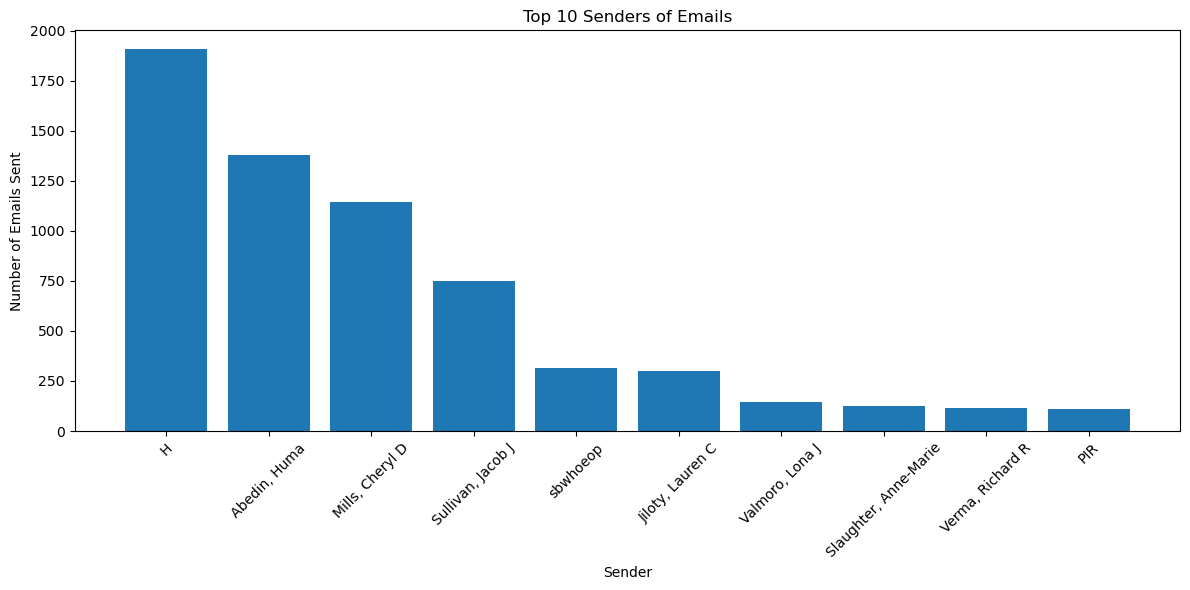

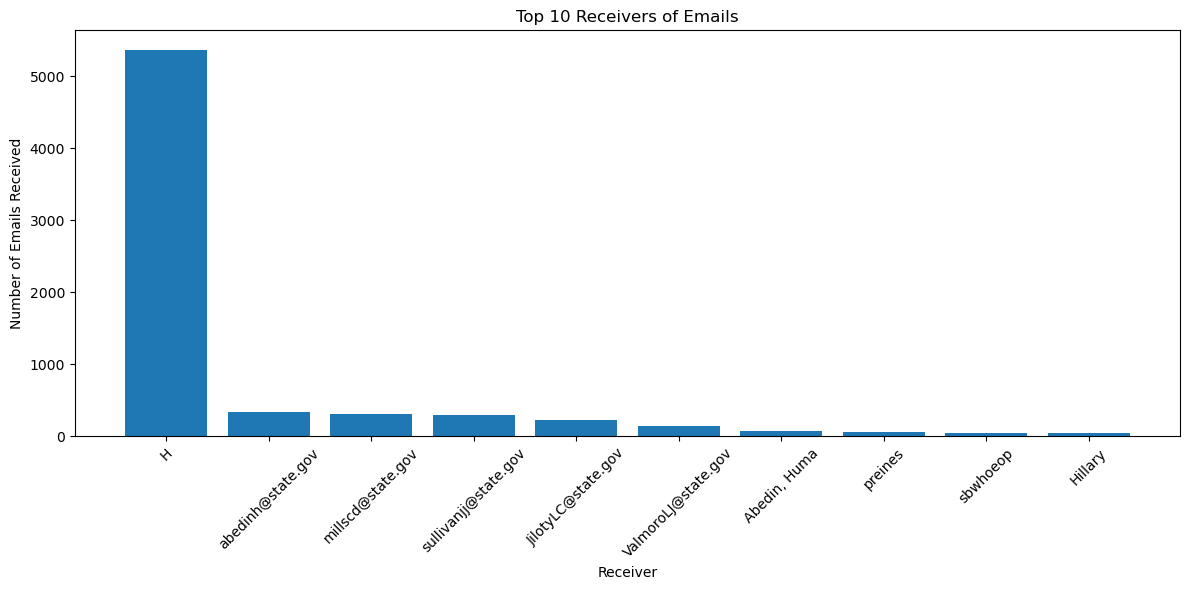

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
emails = pd.read_csv("Emails.csv")

# Get the count of emails sent by each sender
senders_counts = emails.groupby('MetadataFrom').size().reset_index(name='EmailsSent')
# Get the count of emails received by each receiver
receivers_counts = emails.groupby('MetadataTo').size().reset_index(name='EmailsReceived')

# Fill missing values with 0
senders_counts = senders_counts.fillna(0)
receivers_counts = receivers_counts.fillna(0)

# Sort the data by the total count
senders_counts = senders_counts.sort_values(by='EmailsSent', ascending=False)
receivers_counts = receivers_counts.sort_values(by='EmailsReceived', ascending=False)

# Get the top 10 senders and receivers
top_senders = senders_counts.head(10)
top_receivers = receivers_counts.head(10)

# Plot for senders
plt.figure(figsize=(12, 6))
plt.bar(top_senders['MetadataFrom'], top_senders['EmailsSent'])
plt.xlabel('Sender')
plt.ylabel('Number of Emails Sent')
plt.title('Top 10 Senders of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for receivers
plt.figure(figsize=(12, 6))
plt.bar(top_receivers['MetadataTo'], top_receivers['EmailsReceived'])
plt.xlabel('Receiver')
plt.ylabel('Number of Emails Received')
plt.title('Top 10 Receivers of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


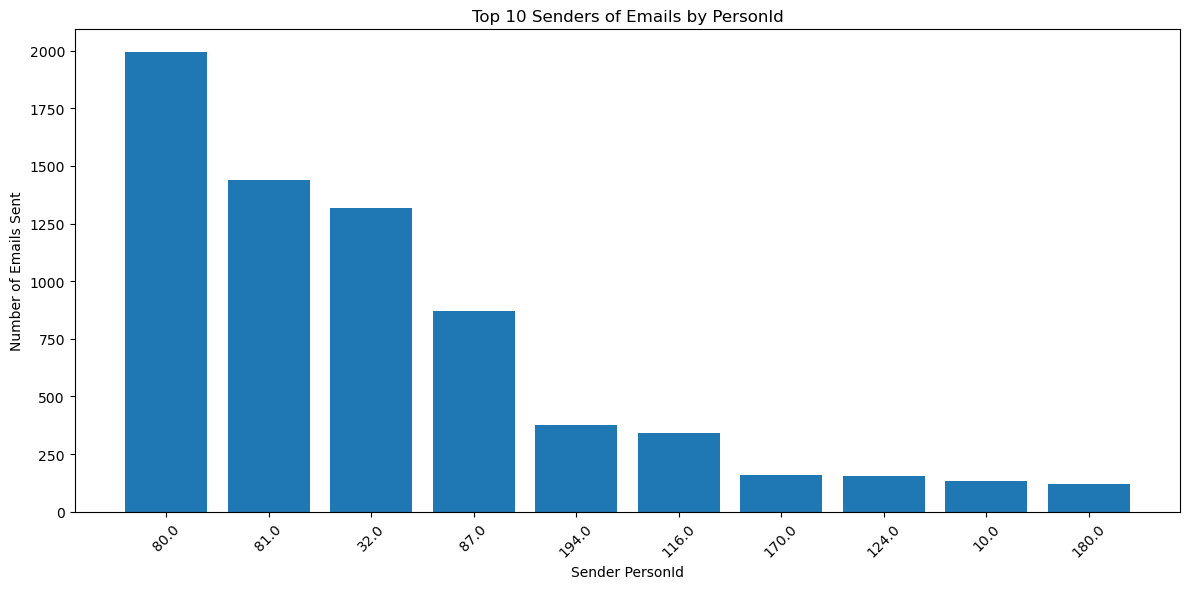

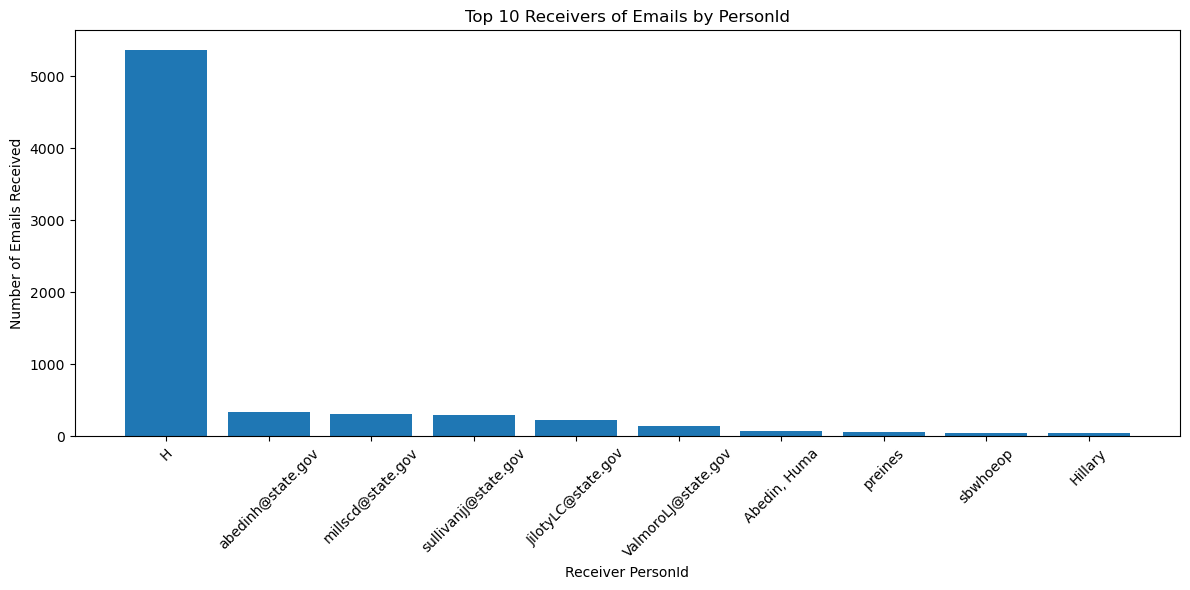

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
emails = pd.read_csv("Emails.csv")

# Get the count of emails sent by each sender
senders_counts = emails.groupby('SenderPersonId').size().reset_index(name='EmailsSent')
# Get the count of emails received by each receiver
receivers_counts = emails.groupby('MetadataTo').size().reset_index(name='EmailsReceived')

# Sort the data by the total count
senders_counts = senders_counts.sort_values(by='EmailsSent', ascending=False)
receivers_counts = receivers_counts.sort_values(by='EmailsReceived', ascending=False)

# Get the top 10 senders and receivers
top_senders = senders_counts.head(10)
top_receivers = receivers_counts.head(10)

# Plot for senders
plt.figure(figsize=(12, 6))
plt.bar(top_senders['SenderPersonId'].astype(str), top_senders['EmailsSent'])
plt.xlabel('Sender PersonId')
plt.ylabel('Number of Emails Sent')
plt.title('Top 10 Senders of Emails by PersonId')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for receivers
plt.figure(figsize=(12, 6))
plt.bar(top_receivers['MetadataTo'].astype(str), top_receivers['EmailsReceived'])
plt.xlabel('Receiver PersonId')
plt.ylabel('Number of Emails Received')
plt.title('Top 10 Receivers of Emails by PersonId')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


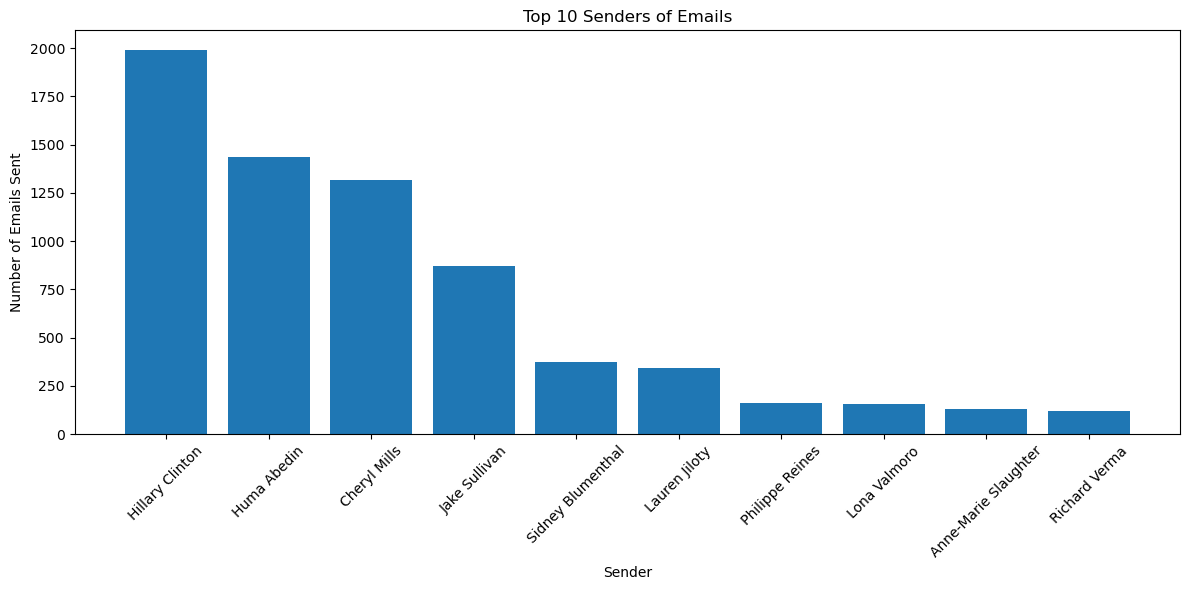

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
emails = pd.read_csv("Emails.csv")
persons = pd.read_csv("Persons.csv")

# Get the count of emails sent by each sender
senders_counts = emails['SenderPersonId'].value_counts().reset_index()
senders_counts.columns = ['SenderPersonId', 'EmailsSent']

# Merge with Persons.csv to get sender names
senders_counts = senders_counts.merge(persons, left_on='SenderPersonId', right_on='Id', how='left')

# Sort the data by the total count
senders_counts = senders_counts.sort_values(by='EmailsSent', ascending=False)

# Get the top 10 senders
top_senders = senders_counts.head(10)

# Plot for senders
plt.figure(figsize=(12, 6))
plt.bar(top_senders['Name'], top_senders['EmailsSent'])
plt.xlabel('Sender')
plt.ylabel('Number of Emails Sent')
plt.title('Top 10 Senders of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
